# 1.Project development motive

폐암 발생 환자의 증상 중 가장 관련 높은 증상과 가장 많은 나이대를 알고자 함

# 2.Project summary

## 2-1.Applied programming languages ​​and technologies

> Python

>COLAB

> XGB

## 2-2.Expected Effects and Utilization Plans

환자의 증상 여부와 나이대를 확인하여 폐암 발생 확률을 예측할 수 있음

# 3.Project production process

##3-1.필요한 패키지 import

In [225]:
import pandas as pd
import numpy as np

## 3-2.데이터 불러오기

In [226]:
data = pd.read_csv('/content/drive/MyDrive/BigData/CSV_File/survey lung cancer.csv')

In [227]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


> 총 번호 속성 수 : 16 

> 인스턴스 수 : 284 

> 속성 정보

1. 성별: M(남성), F(여성) 
2. 연령: 환자의 연령 
3. 흡연: 예=2, 아니요=1
4. 노란 손가락: 예=2, 아니요=1
5. 불안: 예=2, 아니요=1
6. 동료 압력: 예=2, 아니요=1
7. 만성 질환: 예=2, 아니오=1
8. 피로: 예=2, 아니요=1
9. 알레르기: 예=2, 아니요=1
10. 쌕쌕거림: 예=2, 아니요=1
11. 알코올: 예=2, 아니요=1
12. 기침: 예=2, 아니요=1
13. 숨가쁨: 예=2, 아니요=1
14. 삼키기 어려움: 예=2, 아니요=1
15. 흉통: 예=2, 아니오=1
16. 폐암: 예, 아니요

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## 3-3.데이터 전처리

In [229]:
# 카테고리 데이터타입의 성별 컬럼 수치화

data=data.replace({1: 'NO', 2: 'YES'})
data=data.replace({'NO' : 0, 'F' : 0, 'M' : 1, 'YES' : 1})

In [230]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


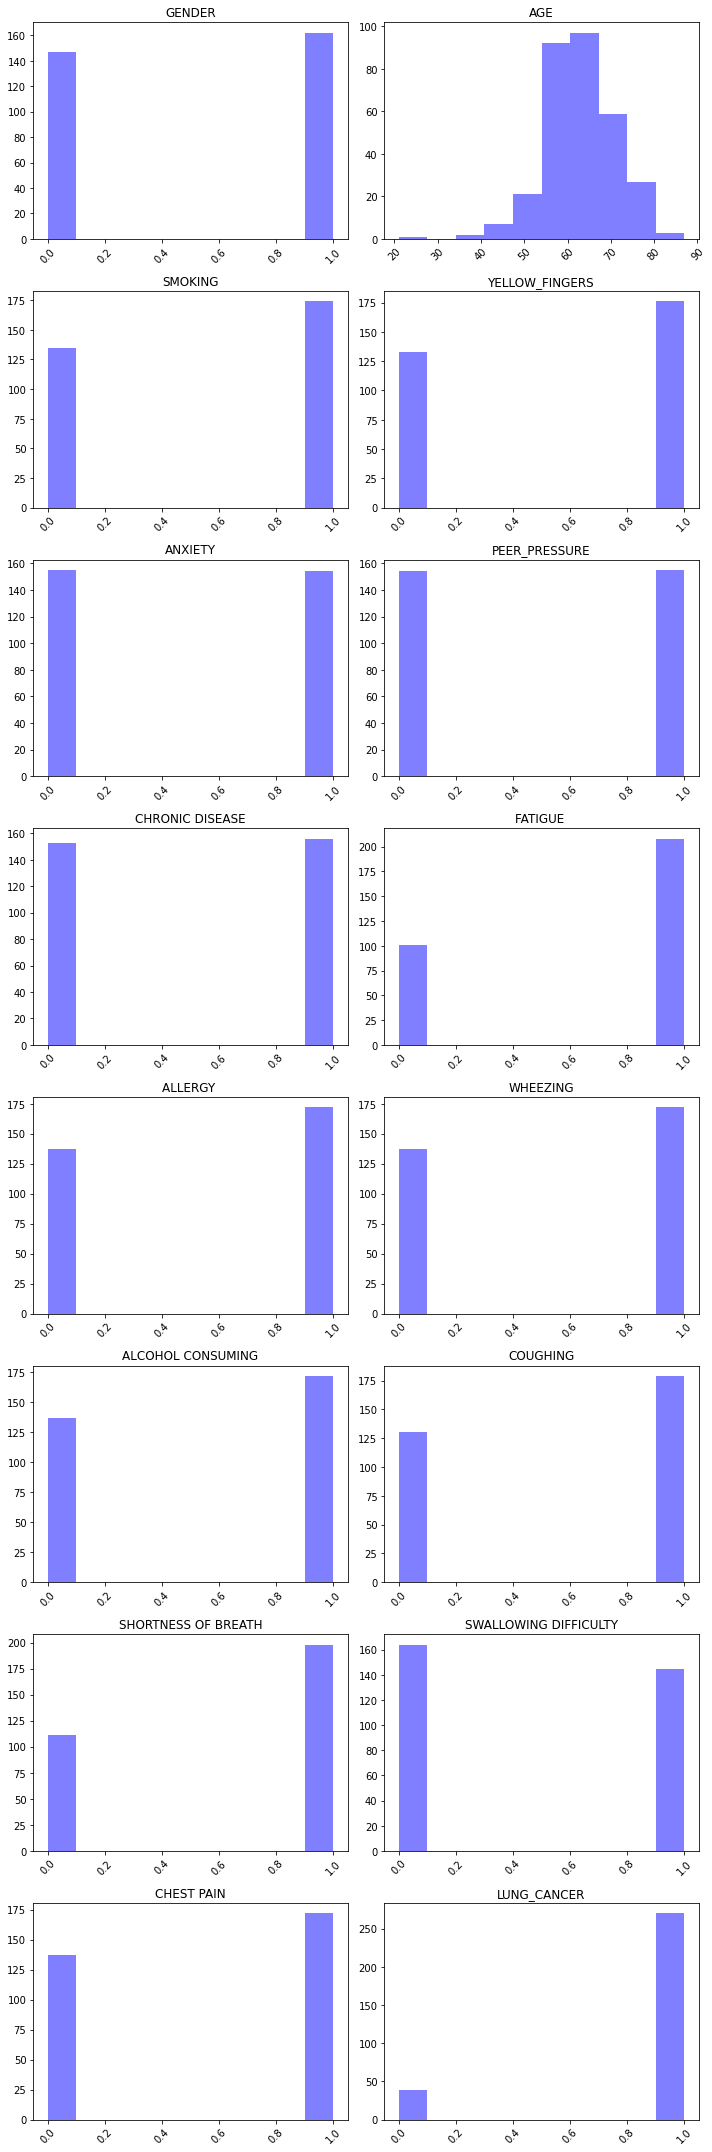

In [231]:
# 데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

num_list = list(data.columns)
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(8, 2, i+1)
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(data[num_list[i]], color='blue', alpha=0.5)

plt.tight_layout()

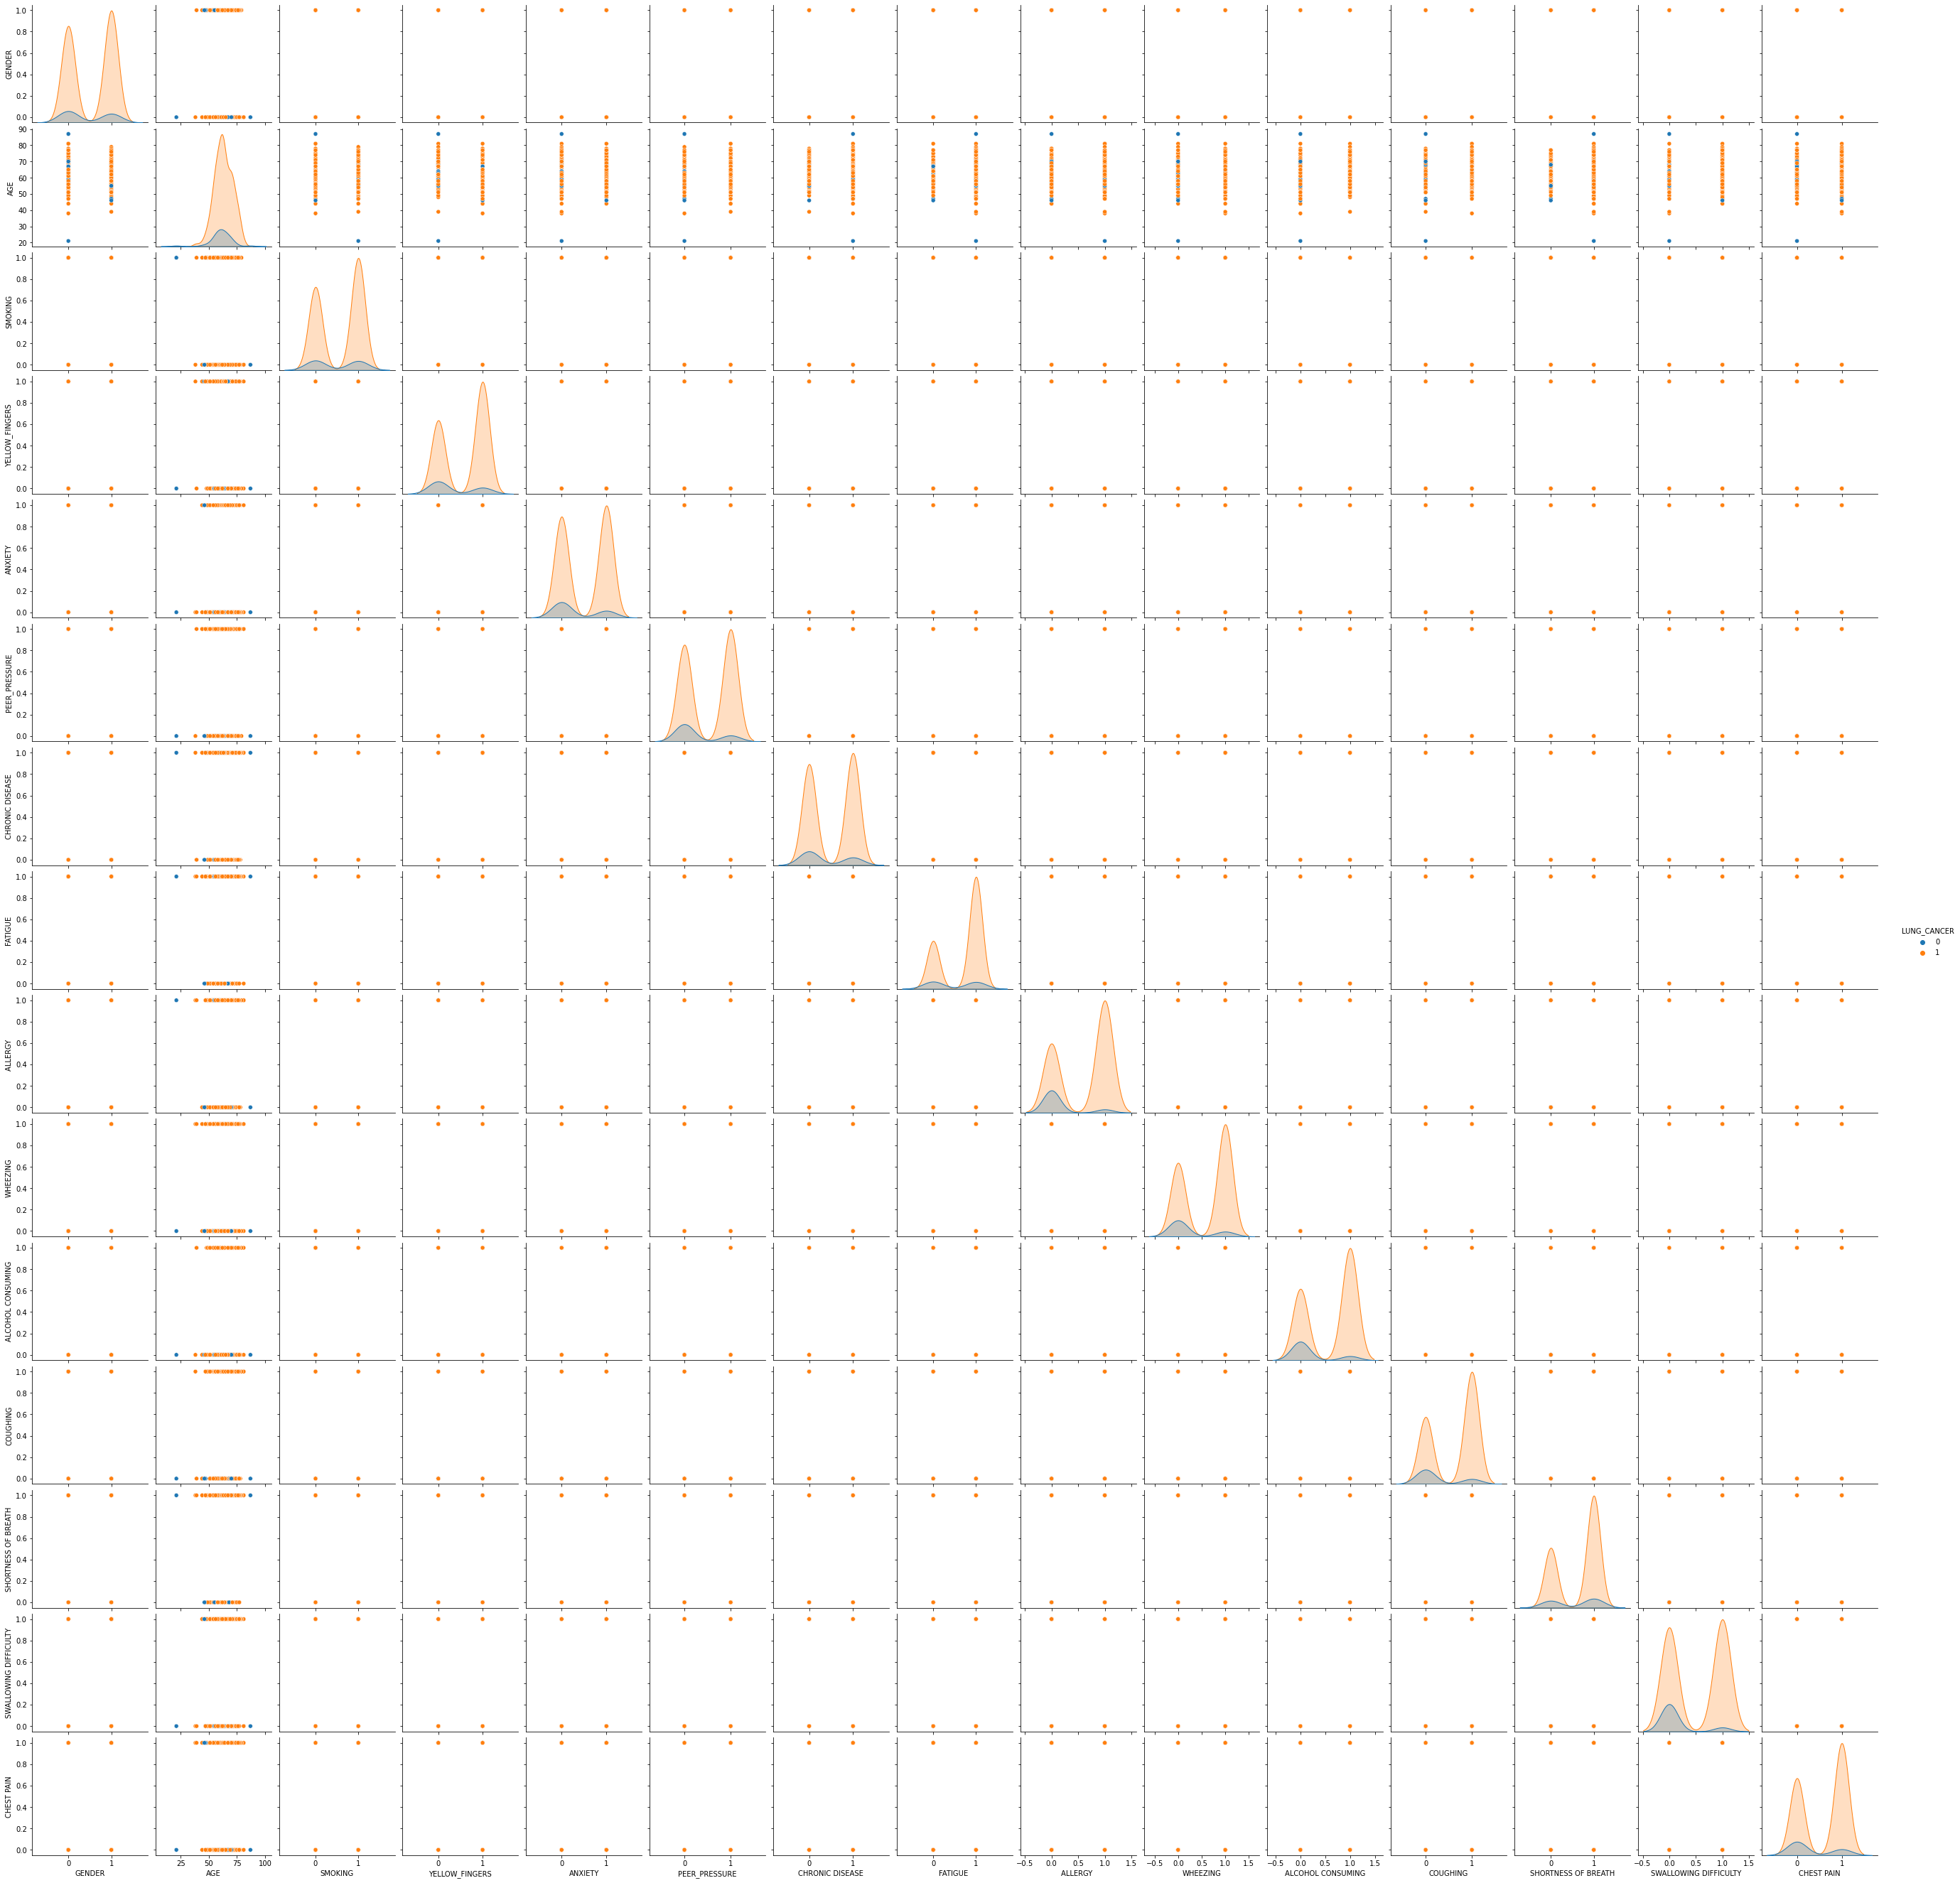

In [232]:
sns.pairplot(data, hue='LUNG_CANCER')

##3-4.데이터 분할

In [233]:
X = data.drop('LUNG_CANCER', axis = 1)
y = data['LUNG_CANCER']

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1996)

In [235]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(247, 15) (62, 15) (247,) (62,)


In [236]:
# 나이 최소최대정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train['AGE'] = mms.fit_transform(X_train[['AGE']])
X_test['AGE'] = mms.transform(X_test[['AGE']])

## 3-5. 데이터 학습

In [237]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
params = {'max_depth': 3, 'eta': 0.5, 'num_class': 4}

num_round = 10

bst = xgb.train(params, dtrain, num_round)
dtest = xgb.DMatrix(X_test)
pred = bst.predict(dtest)

##3-6.데이터 예측

In [238]:
dtest = xgb.DMatrix(X_test)
pred = bst.predict(dtest)

##3-7.모델 성능 평가

In [239]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, pred)
print(score)

0.9516129032258065


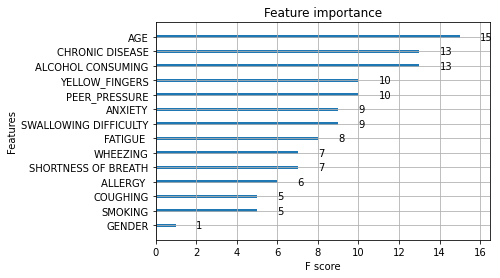

In [240]:
xgb.plot_importance(bst)

각 컬럼 데이터들이 폐암 발생에 미치는 영향 시각화

count    270.000000
mean       0.611111
std        0.488403
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ALCOHOL CONSUMING, dtype: float64


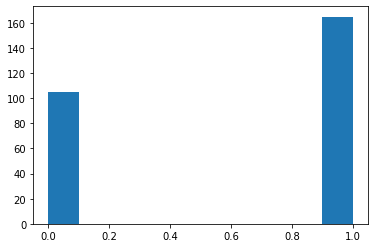

In [241]:
print(data[data['LUNG_CANCER']==1]['ALCOHOL CONSUMING'].describe())
plt.hist(data[data['LUNG_CANCER']==1]['ALCOHOL CONSUMING'],bins=10)
plt.show()

count    270.000000
mean       0.525926
std        0.500255
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: CHRONIC DISEASE, dtype: float64


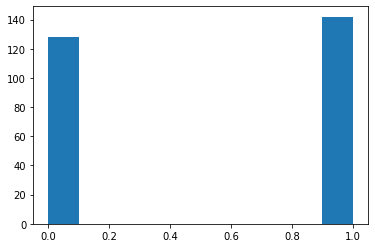

In [242]:
print(data[data['LUNG_CANCER']==1]['CHRONIC DISEASE'].describe())
plt.hist(data[data['LUNG_CANCER']==1]['CHRONIC DISEASE'],bins=10)
plt.show()

count    270.000000
mean      62.951852
std        7.966560
min       38.000000
25%       58.000000
50%       62.500000
75%       69.000000
max       81.000000
Name: AGE, dtype: float64


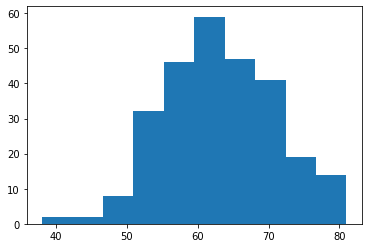

In [243]:
print(data[data['LUNG_CANCER']==1]['AGE'].describe())

plt.hist(data[data['LUNG_CANCER']==1]['AGE'],bins=10)
plt.show()

In [244]:
# 상관관계 분석

cor = data.corr().sort_values('LUNG_CANCER',ascending = False)
cor

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
LUNG_CANCER,0.067254,0.089465,0.058179,0.181339,0.144947,0.186388,0.110891,0.150673,0.327766,0.249300,0.288533,0.248570,0.060738,0.259730,0.190451,1.000000
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
ALCOHOL CONSUMING,0.454268,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533
SWALLOWING DIFFICULTY,-0.078161,-0.001270,0.030718,0.345904,0.489403,0.366590,0.075176,-0.132790,-0.061508,0.069027,-0.009294,-0.157586,-0.161015,1.000000,0.069027,0.259730
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
COUGHING,0.133303,0.169950,-0.129471,-0.012640,-0.225644,-0.089019,-0.175287,0.146856,0.189524,0.374265,0.202720,1.000000,0.277385,-0.157586,0.083958,0.248570
CHEST PAIN,0.362958,-0.018104,0.120117,-0.104829,-0.113634,-0.094828,-0.036938,-0.010832,0.239433,0.147640,0.331226,0.083958,0.024256,0.069027,1.000000,0.190451
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673


# 4.Conclusions from this project

폐암이 발생한 환자의 증상 중 알레르기, 음주, 연하곤란이 상관관계가 가장 높았고 60대의 폐암 환자가 가장 많았다.

# 5.Data source

https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

# 깃허브 연동 코드

In [245]:
cd '/content/drive/MyDrive/BigData/Projects'

/content/drive/MyDrive/BigData/Projects


In [246]:
!git config --global user.name 'dydwns9436'
!git config --global user.email 'dydwns9436@naver.com'

!git add Proj_Python_LungCancer.ipynb

!git commit -m '2022-0'
!git push

[main 7494323] start_2022-06-29/end_2022
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Proj_Python_LungCancer.ipynb (95%)
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.61 KiB | 275.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/dydwns9436/Projects.git
   10892d3..7494323  main -> main
